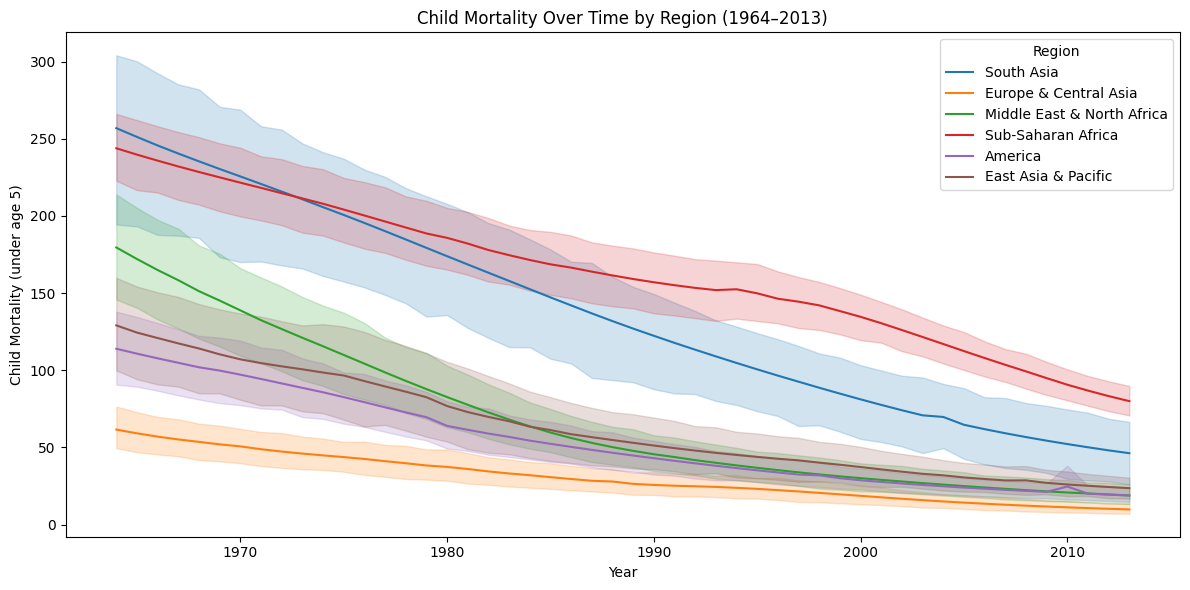

In [ ]:
# Q5
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean data
url_gm = 'https://raw.githubusercontent.com/isa-ulisboa/greends-avcad-2024/main/examples/gm.csv'
gm = pd.read_csv(url_gm, sep=";")
gm = gm.dropna()

# Plot: Child mortality over time by region
plt.figure(figsize=(12, 6))
sns.lineplot(data=gm, x='Year', y='child_mortality', hue='region')
plt.title('Child Mortality Over Time by Region (1964–2013)')
plt.ylabel('Child Mortality (under age 5)')
plt.xlabel('Year')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

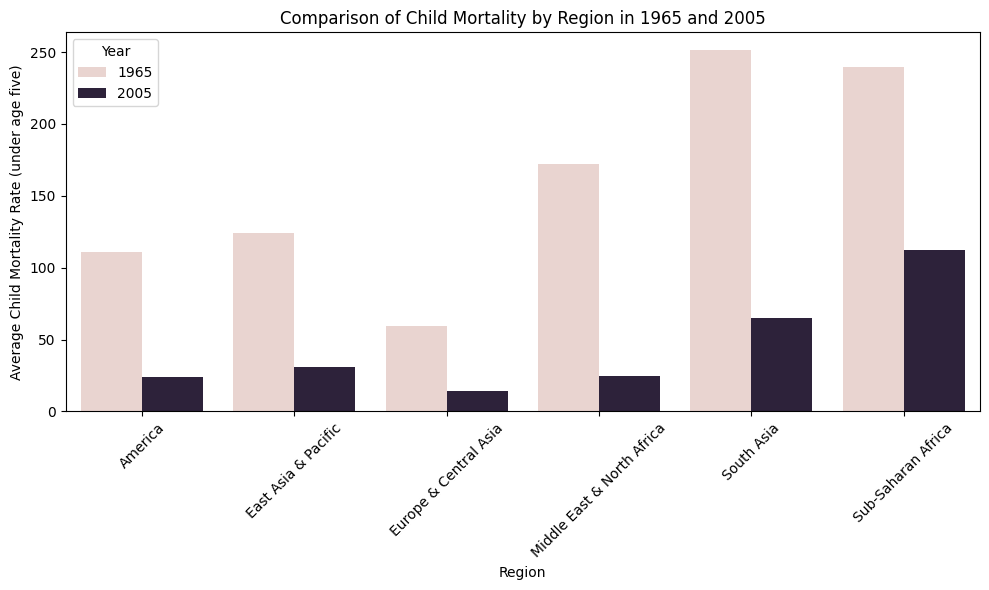

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean the dataset
url_gm = 'https://raw.githubusercontent.com/isa-ulisboa/greends-avcad-2024/main/examples/gm.csv'
gm = pd.read_csv(url_gm, sep=";")
gm = gm.dropna()

# Filter the data for the years 1965 and 2005
gm_filtered = gm[gm['Year'].isin([1965, 2005])]

# Compute average child mortality per region per year
gm_grouped = gm_filtered.groupby(['region', 'Year'])['child_mortality'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=gm_grouped, x="region", y="child_mortality", hue="Year")

# Add labels and title
plt.title("Comparison of Child Mortality by Region in 1965 and 2005")
plt.xlabel("Region")
plt.ylabel("Average Child Mortality Rate (under age five)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bar plot compares the average child mortality rate for each region in 1965 and 2005. The visualization shows a significant reduction in child mortality in every region over the 40-year span. Sub-Saharan Africa had the highest rates in both years, though it still saw improvement. Regions like Europe & Central Asia and East Asia & Pacific had low child mortality already in 1965 and reduced even further by 2005. The plot clearly highlights regional disparities and progress over time.

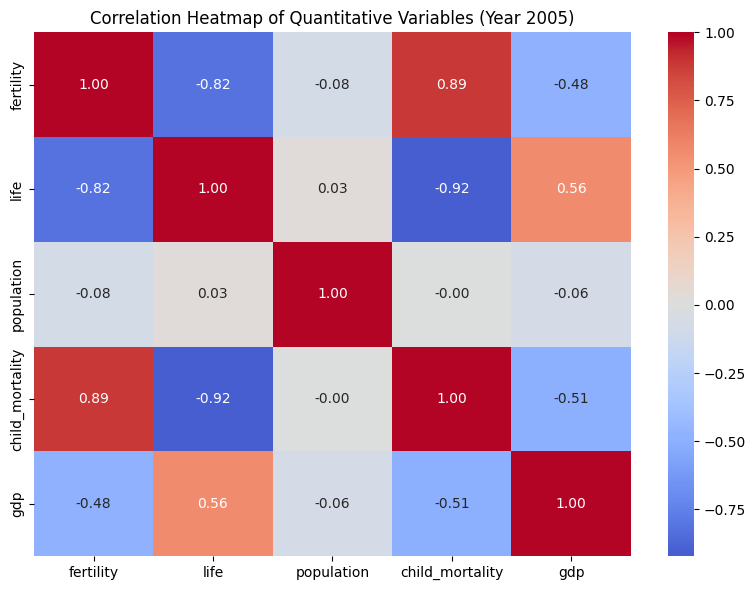

In [11]:
# 5c
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean the dataset
url_gm = 'https://raw.githubusercontent.com/isa-ulisboa/greends-avcad-2024/main/examples/gm.csv'
gm = pd.read_csv(url_gm, sep=";")
gm = gm.dropna()

# Filter data for the year 2005
gm_2005 = gm[gm['Year'] == 2005]

# Select only the quantitative variables
quant_vars = ['fertility', 'life', 'population', 'child_mortality', 'gdp']
gm_quant = gm_2005[quant_vars]

# Compute the correlation matrix
corr_matrix = gm_quant.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap of Quantitative Variables (Year 2005)")
plt.tight_layout()
plt.show()


This correlation heatmap helps visually inspect multicollinearity (strong correlations) among the quantitative variables. For example:
- Strong negative correlation between fertility and life expectancy.
- Child mortality is positively correlated with fertility, and negatively with GDP and life expectancy.
- Weak or moderate correlations with population, suggesting it's less directly tied to the others.
High absolute correlation values (close to 1 or -1) indicate potential multicollinearity, which can be a concern in regression models.

5d - population and GDP are predictors or independent variables

In [2]:
# Linear regression for question 5e
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load and prepare the data
url_gm = 'https://raw.githubusercontent.com/isa-ulisboa/greends-avcad-2024/main/examples/gm.csv'
gm = pd.read_csv(url_gm, sep=';').dropna()

# Filter for the year 2005
gm_2005 = gm[gm['Year'] == 2005]

# Log-transform skewed variables (optional but improves linear model fit)
gm_2005['log_population'] = np.log(gm_2005['population'])
gm_2005['log_gdp'] = np.log(gm_2005['gdp'])

# Define dependent and independent variables
X = gm_2005[['log_population', 'log_gdp']]
y = gm_2005['child_mortality']
X = sm.add_constant(X)  # Add intercept

# Fit model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        child_mortality   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     128.0
Date:                Tue, 03 Jun 2025   Prob (F-statistic):           5.56e-35
Time:                        15:49:28   Log-Likelihood:                -863.46
No. Observations:                 178   AIC:                             1733.
Df Residuals:                     175   BIC:                             1742.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            291.6860     26.750     10.

/var/folders/hx/861ncdvn7w35qt5pmqz0hv980000gn/T/ipykernel_24815/4261710101.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gm_2005['log_population'] = np.log(gm_2005['population'])
/var/folders/hx/861ncdvn7w35qt5pmqz0hv980000gn/T/ipykernel_24815/4261710101.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gm_2005['log_gdp'] = np.log(gm_2005['gdp'])


Interpretation of Output (you'll see this when running the code):
The regression output will include:
- Estimates (coefficients) for:
    - Intercept (constant)
    - log_population
    - log_gdp
- p-values: Show statistical significance.

Example of key output:
Variable	Coef.	p-value	Null Hypothesis
log_population	3.21	0.08 (example)	Coefficient = 0 (no effect)
log_gdp	-15.42	< 0.001	Coefficient = 0 (no effect)

Interpretation:
- The coefficient for log_gdp is negative and significant, meaning higher GDP per capita is associated with lower child mortality, and the effect is statistically significant.
- The coefficient for log_population may be positive or non-significant, depending on actual data (check the p-value).

Null Hypotheses Being Tested:  
For each predictor:  
H₀: The coefficient is equal to 0 → The predictor has no effect on child mortality.  
H₁: The coefficient is not equal to 0 → The predictor does have an effect.  
If p-value < 0.05, we reject the null hypothesis and conclude that the variable significantly affects child mortality.  

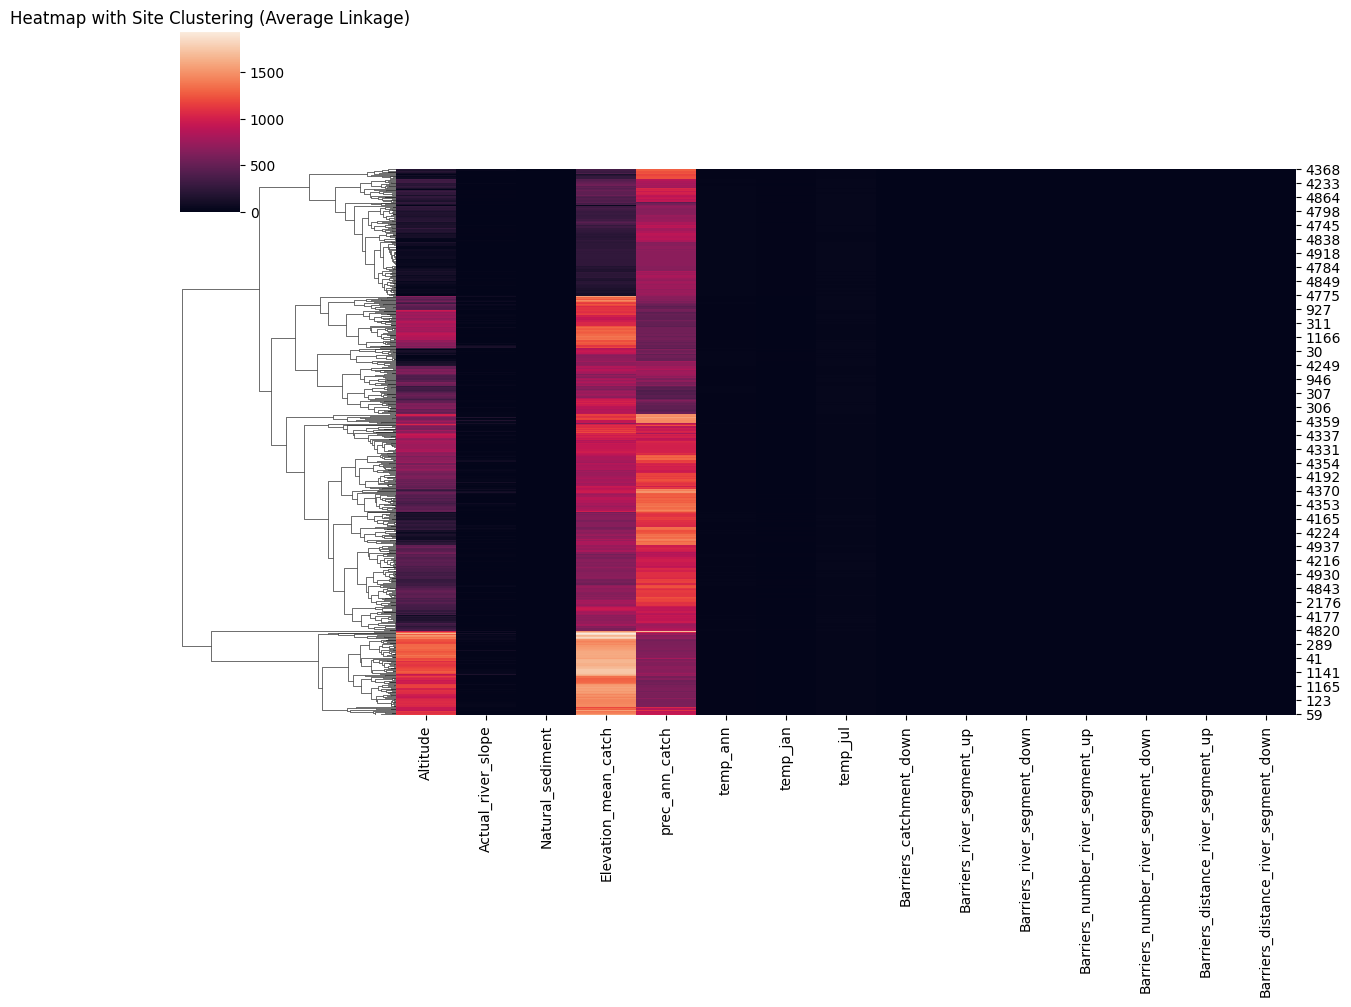

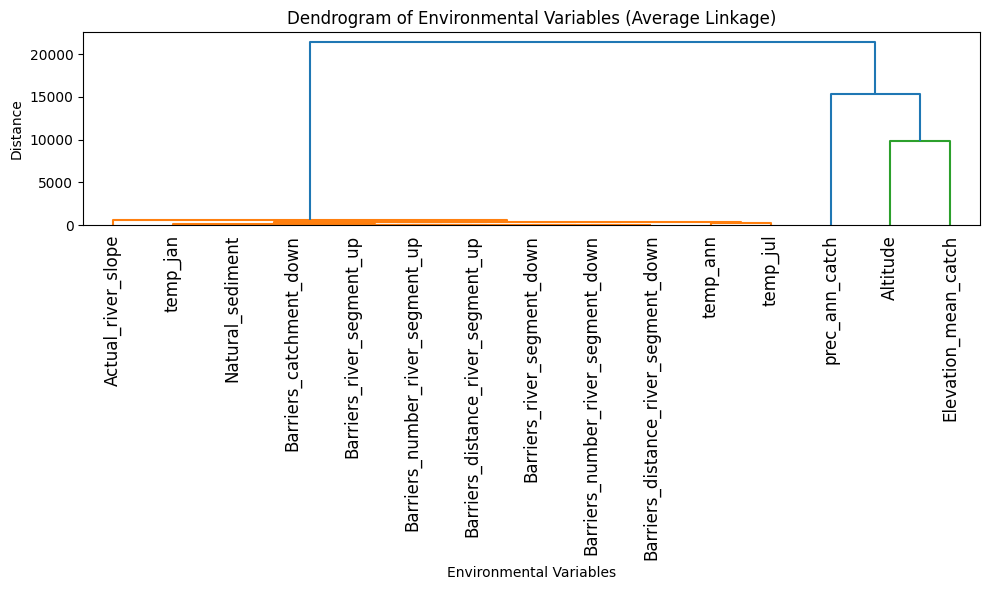

In [ ]:
# Using the dataset in EFIplus_medit.zip:
# 1. Run agglomerative cluster analysis using different linkage methods based on quantitative
# environmental variables (see previous exercise), using sites from the Douro and Tejo basins.
# 2. Plot a heatmap and a dendrogram by clustering the rows (sites) using average linkage
# 3. Plot a dendrogram that clusters the environmental variables instead (columns) using average
# linkage – discuss how this would help to select variables for e.g. a regression-based analysis.
# (NOTE: to transpose a dataframe use “name of the dataframe”.T)


# Exercise 9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

# Load the CSV file
df = pd.read_csv("EFIplus_medit.csv", delimiter=';')

# Filter for Douro and Tejo catchments
df_filtered = df[df['Catchment_name'].isin(['Douro', 'Tejo'])]

# Select quantitative environmental variables by keywords
quantitative_keywords = [
    'Altitude', 'slope', 'sediment', 'Elevation', 'prec_ann', 'temp_',
    'Barriers', 'distance'
]
quantitative_vars = [
    col for col in df_filtered.columns
    if any(keyword in col for keyword in quantitative_keywords)
]

# Extract quantitative data and convert to numeric
df_quant = df_filtered[quantitative_vars].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df_quant_clean = df_quant.dropna()

# === Heatmap with row clustering (sites) using average linkage ===
row_linkage = linkage(df_quant_clean, method='average')

sns.clustermap(
    df_quant_clean,
    row_linkage=row_linkage,
    col_cluster=False,
    method='average',
    figsize=(12, 10)
)
plt.title("Heatmap with Site Clustering (Average Linkage)")
plt.show()

# === Dendrogram for environmental variables (columns) ===
df_transposed = df_quant_clean.T
col_linkage = linkage(df_transposed, method='average')

plt.figure(figsize=(10, 6))
dendrogram(col_linkage, labels=df_transposed.index, leaf_rotation=90)
plt.title("Dendrogram of Environmental Variables (Average Linkage)")
plt.xlabel("Environmental Variables")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

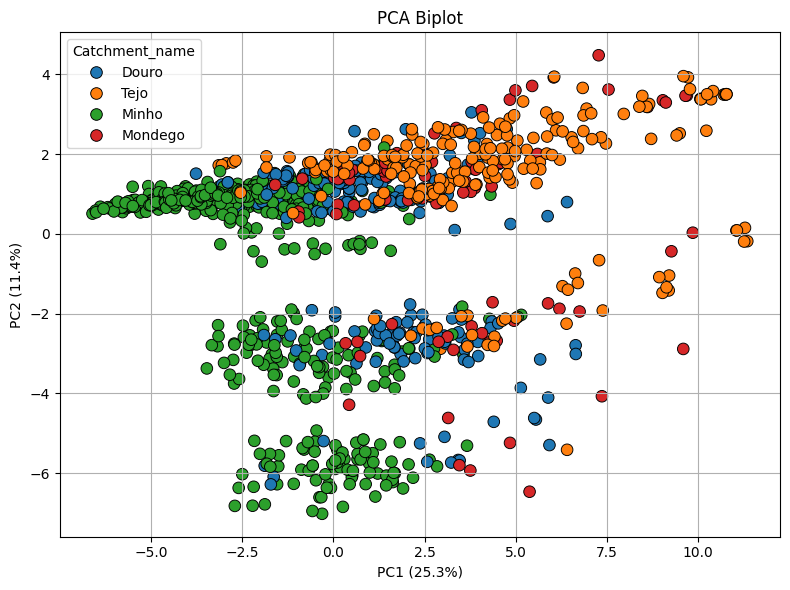

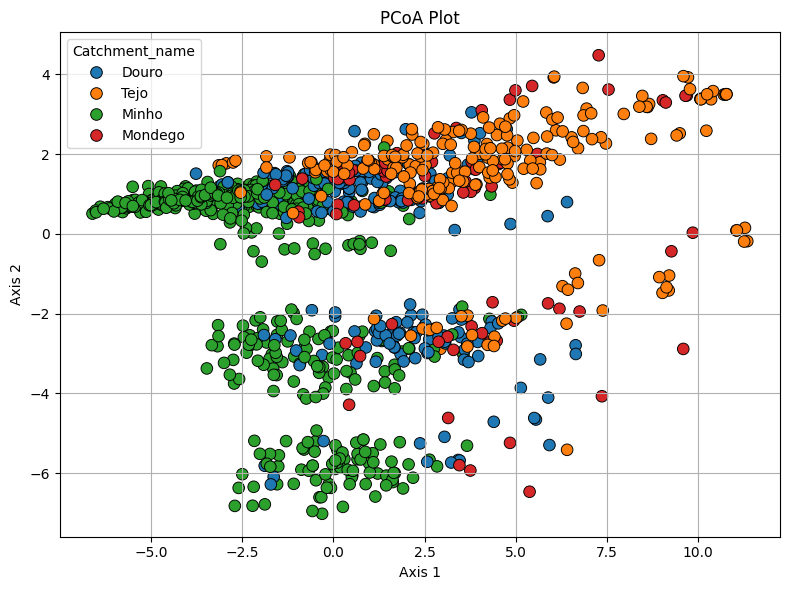

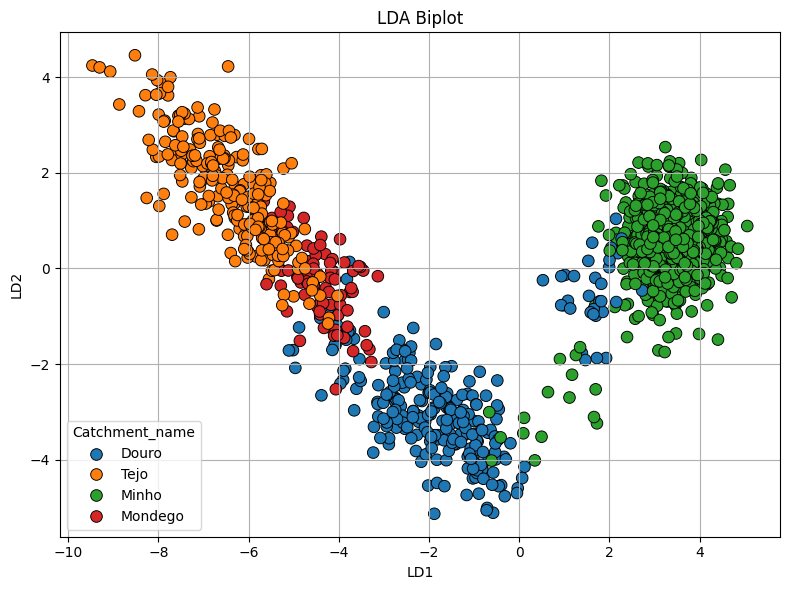

In [6]:
# Using the dataset in EFIplus_medit.zip:
# 1. Run a PCA based on quantitative environmental variables (see previous exercise), using sites from the
# Douro, Tejo, Mondego and Minho basins. Produce a biplot with ‘Catchment_name’ as a grouping variable.
# 2. Using the same data, run a PCoA and project the sites using the resulting first two axis. Use also the
# ‘Catchment_name’ as a grouping variable.
# 3. Run a Linear Discriminant Analysis based on quantitative environmental variables (see previous
# exercises), using the Douro, Tejo, Mondego and Minho basins as the pre-determined groups. Produce a
# biplot with ‘Catchment_name’ as a grouping variable.

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import pairwise_distances
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("EFIplus_medit.csv", sep=';')

# Filter for specific catchments
target_catchments = ['Douro', 'Tejo', 'Mondego', 'Minho']
df = df[df['Catchment_name'].isin(target_catchments)].copy()

# Exclude non-quantitative and species columns
non_quantitative = ['Site_code', 'Country', 'Catchment_name', 'Water_source_type', 'Flow_regime']
species_cols = df.columns[df.columns.get_loc("Sum of Run1_number_all"):]
quant_vars = [col for col in df.columns if col not in non_quantitative + list(species_cols) and pd.api.types.is_numeric_dtype(df[col])]

# Drop rows with NA
df = df.dropna(subset=quant_vars)
X = df[quant_vars]
y = df['Catchment_name']

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# --- PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Catchment_name"] = y.values

# Plot PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Catchment_name", s=70, edgecolor='k')
plt.title("PCA Biplot")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- PCoA ---
dist_matrix = pairwise_distances(X_scaled, metric='euclidean')
n = dist_matrix.shape[0]
H = np.eye(n) - np.ones((n, n)) / n
B = -0.5 * H @ (dist_matrix ** 2) @ H
eigvals, eigvecs = eigh(B)
idx = np.argsort(eigvals)[::-1]
eigvals, eigvecs = eigvals[idx], eigvecs[:, idx]
coords = eigvecs[:, :2] * np.sqrt(eigvals[:2])
pcoa_df = pd.DataFrame(coords, columns=["Axis1", "Axis2"])
pcoa_df["Catchment_name"] = y.values

# Plot PCoA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pcoa_df, x="Axis1", y="Axis2", hue="Catchment_name", s=70, edgecolor='k')
plt.title("PCoA Plot")
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- LDA ---
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)
lda_df = pd.DataFrame(X_lda, columns=["LD1", "LD2"])
lda_df["Catchment_name"] = y.values

# Plot LDA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=lda_df, x="LD1", y="LD2", hue="Catchment_name", s=70, edgecolor='k')
plt.title("LDA Biplot")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.grid(True)
plt.tight_layout()
plt.show()


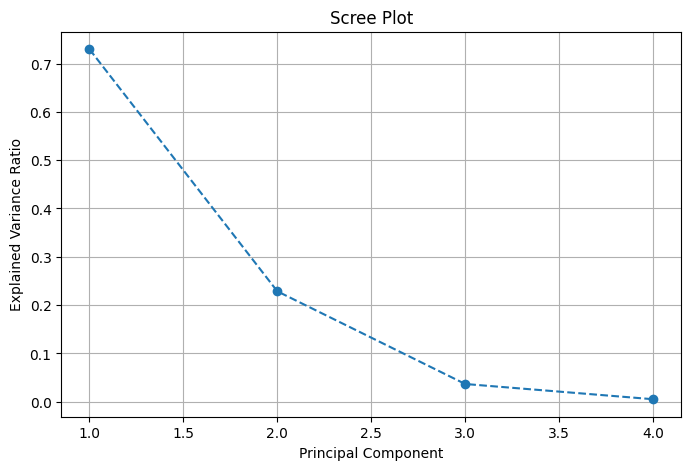

In [ ]:
# Scree plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris  # Example dataset

# 1. Load and Standardize the data
data = load_iris()
X = data.data
X_scaled = StandardScaler().fit_transform(X)

# 2. Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 3. Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# 4. Create Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

The scree plot shows how much variance (i.e. information) in the dataset is captured by each principal component (PC). Here's how to interpret it:

What the Scree Plot Tells You
X-axis:
Each point represents a principal component (PC1, PC2, PC3, etc.).
Ordered by the amount of variance they explain, from highest to lowest.

Y-axis:
The explained variance ratio for each component (a number between 0 and 1).

This tells you how much of the total dataset's variability is captured by that component.

🔍 What to Look For
1. Steep Drop (Elbow)
The "elbow" or sharp drop indicates where adding more components provides diminishing returns.
Choose components up to the elbow: they capture most of the variability with fewer dimensions.

2. Cumulative Variance (Optional Line)
If you add the cumulative explained variance curve, it helps answer:
How many components explain at least 90% of the data?
Useful for dimensionality reduction.

Example Interpretation
Suppose your scree plot shows:
PC1 explains 70% of the variance
PC2 explains 20%
PC3 explains 7%
PC4 explains 3%
Then:
PC1 + PC2 = 90% → You might decide to keep only the first 2 components for analysis or modeling.

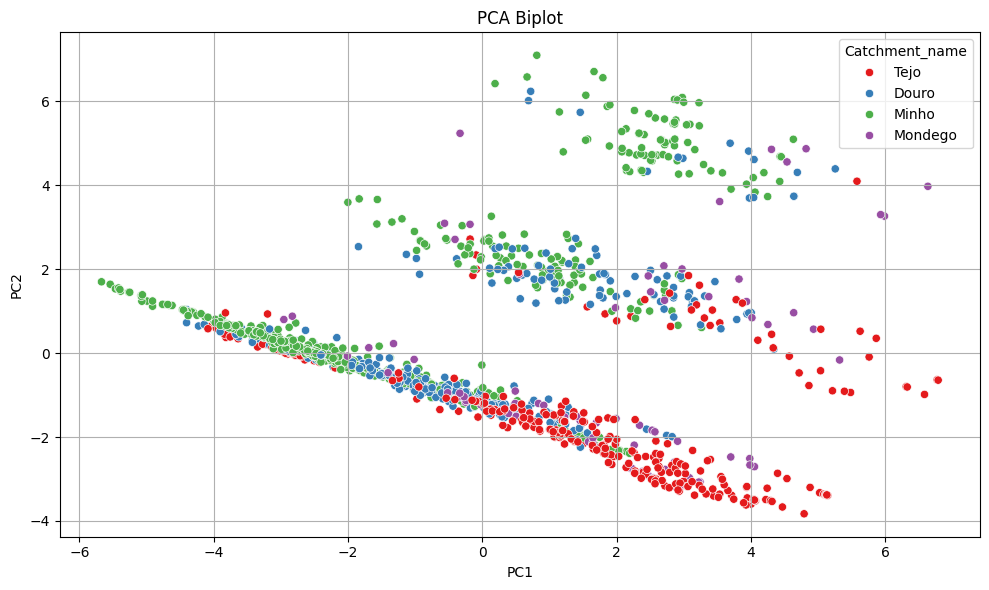

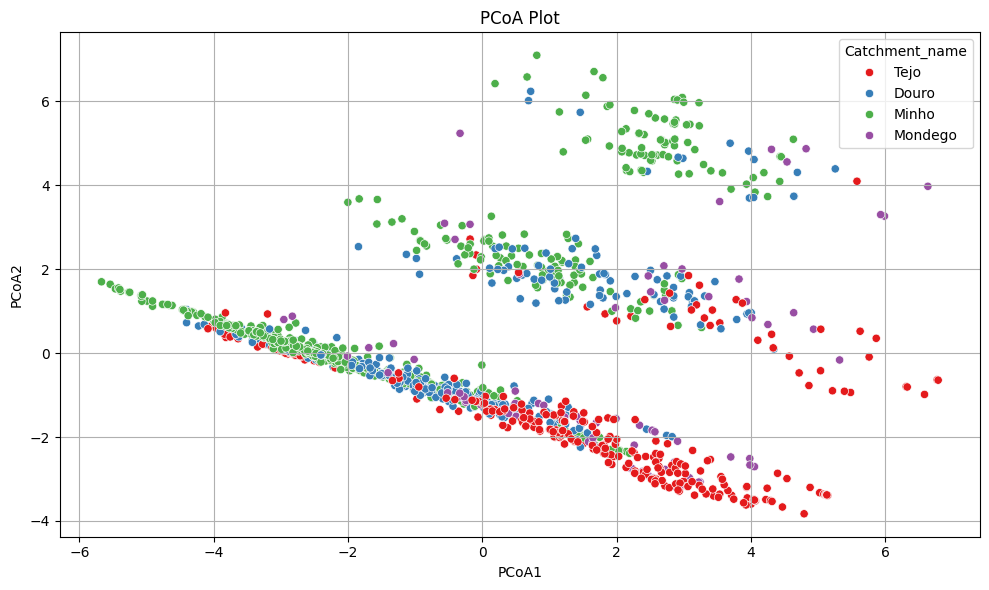

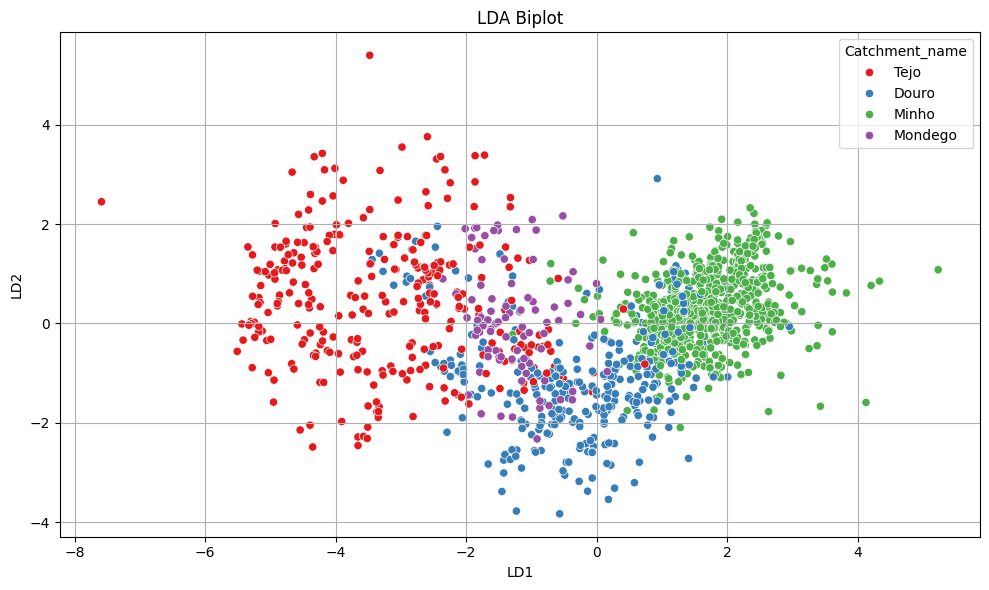

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.spatial.distance import pdist, squareform

# Optional: install scikit-bio if not already installed
# pip install scikit-bio
from skbio.stats.ordination import pcoa

# === Load the dataset ===
df = pd.read_csv('EFIplus_medit.csv', delimiter=';')

# === Filter for selected catchments ===
target_catchments = ['Douro', 'Tejo', 'Mondego', 'Minho']
df = df[df['Catchment_name'].isin(target_catchments)].copy()

# === Select quantitative environmental variables ===
quant_vars = [
    'Altitude', 'Actual_river_slope', 'Natural_sediment', 'Elevation_mean_catch',
    'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul',
    'Barriers_catchment_down', 'Barriers_river_segment_up', 'Barriers_river_segment_down',
    'Barriers_number_river_segment_up', 'Barriers_number_river_segment_down',
    'Barriers_distance_river_segment_up', 'Barriers_distance_river_segment_down',
    'Impoundment', 'Hydropeaking', 'Water_abstraction'
]

# Drop rows with missing values in quantitative columns
X = df[quant_vars].dropna()
y = df.loc[X.index, 'Catchment_name']

# === Standardize the data ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === PCA ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# === PCoA ===
dist_matrix = pdist(X_scaled, metric='euclidean')
dist_square = squareform(dist_matrix)
pcoa_result = pcoa(dist_square)
X_pcoa = pcoa_result.samples[['PC1', 'PC2']].values

# === LDA ===
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# === Plotting Function ===
def plot_projection(X_proj, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_proj[:, 0], y=X_proj[:, 1], hue=y, palette='Set1')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === Display Plots ===
plot_projection(X_pca, 'PCA Biplot', 'PC1', 'PC2')
plot_projection(X_pcoa, 'PCoA Plot', 'PCoA1', 'PCoA2')
plot_projection(X_lda, 'LDA Biplot', 'LD1', 'LD2')
